In [243]:
import numpy as np
from matplotlib import pyplot as plt

In [244]:
mX = [
        [
            [10, 2, -6],
            [-1, 4, 2],
            [2, 3, 6]
        ],
        [
            [-5, 2, -8],
            [4, -3, -9],
            [-8, -10, 9]
        ],
        [
            [10, -5, 3, 0],
            [3, -9, 2, -2],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [17, -4, -12],
    [13, -7, -2],
    [9, 10, -10, -18]
]


In [245]:
def checkDiagonallyDominant(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))

    sumWithDiagonal = np.sum(np.abs(x), axis=1)
    sumWithoutDiagonal = sumWithDiagonal - diag

    for i in range(len(x)):
        print(f"Diagonal {i + 1} = {diag[i]}")
        print(f"Total of not diagonal value =", end=" ")

        sudahPrint = 0
        for j, element in enumerate(x[i]):
            if np.abs(element) != diag[i]:
                if sudahPrint != 0:
                    print("+", end=" ")

                print(f"|{element}|", end=" ")
                sudahPrint += 1

        print(f"= {sumWithoutDiagonal[i]}")

    if diag[i] > sumWithoutDiagonal[i]:
        print(f"{diag[i]} > {sumWithoutDiagonal[i]}")
    else:
        print(f"{diag[i]} < {sumWithoutDiagonal[i]}")
        return False

    if np.all(sumWithoutDiagonal > diag):
        return False
    else:
        return True

In [246]:
for i, x in enumerate(mX):
    print(f"Equation {i+1} Array X")
    if(checkDiagonallyDominant(x)):
        print("This Equation is Diagonally Dominant")
    else:
        print("Not Diagonally Dominant")
    print()

Equation 1 Array X
Diagonal 1 = 10
Total of not diagonal value = |2| + |-6| = 8
Diagonal 2 = 4
Total of not diagonal value = |-1| + |2| = 3
Diagonal 3 = 6
Total of not diagonal value = |2| + |3| = 5
6 > 5
This Equation is Diagonally Dominant

Equation 2 Array X
Diagonal 1 = 5
Total of not diagonal value = |2| + |-8| = 10
Diagonal 2 = 3
Total of not diagonal value = |4| + |-9| = 13
Diagonal 3 = 9
Total of not diagonal value = |-8| + |-10| = 18
9 < 18
Not Diagonally Dominant

Equation 3 Array X
Diagonal 1 = 10
Total of not diagonal value = |-5| + |3| + |0| = 8
Diagonal 2 = 9
Total of not diagonal value = |3| + |2| + |-2| = 7
Diagonal 3 = 17
Total of not diagonal value = |-8| + |0| + |-4| = 12
Diagonal 4 = 15
Total of not diagonal value = |3| + |-3| + |-8| = 14
15 > 14
This Equation is Diagonally Dominant



In [247]:
def gaussSeidel(x, y, epsilon, limit):
    x = np.array(x)
    y = np.array(y)

    diag = np.diag(np.abs(x))
    sumWithDiagonal = np.sum(np.abs(x), axis=1)
    sumWithoutDiagonal = sumWithDiagonal - diag

    if np.all(sumWithoutDiagonal > diag):
        print("Not diagonally dominant")
        return False
    
    oldValue = np.zeros(x.shape[0])
    diagonal = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    for i in range(limit):
        newValue = np.array(oldValue)

        print(f"Iteration: {i+1}|", end=" ")
        for j, row in enumerate(x):
            newValue[j] = (y[j] + np.dot(row, newValue))/diagonal[j]
            print(f" X{j+1} = {newValue[j]}", end=" ")
        print()

        distance = np.sqrt(np.sum(np.dot(newValue - oldValue, newValue - oldValue)))

        if distance < epsilon:
            print("Converged")

            return
        
        oldValue = newValue

    print("Not Converged! Need more iteration!")
    return False

In [248]:
for i, (x, y) in enumerate(zip(mX, mY)):
    print(f"Equation {i+1}: ")
    gaussSeidel(x, y, 0.01456, 5)
    print()

Equation 1: 
Iteration: 1|  X1 = 1.7  X2 = -0.575  X3 = -2.279166666666667 
Iteration: 2|  X1 = 0.44749999999999995  X2 = 0.25145833333333334  X3 = -2.2748958333333333 
Iteration: 3|  X1 = 0.2847708333333333  X2 = 0.2086406249999999  X3 = -2.1992439236111108 
Iteration: 4|  X1 = 0.3387255208333334  X2 = 0.18430334201388865  X3 = -2.2050601779513888 
Iteration: 5|  X1 = 0.34010322482638883  X2 = 0.18755589518229154  X3 = -2.207145689199942 
Converged

Equation 2: 
Not diagonally dominant

Equation 3: 
Iteration: 1|  X1 = 0.9  X2 = -0.8111111111111111  X3 = -0.16470588235294117  X4 = 1.6300653594771244 
Iteration: 2|  X1 = 0.5438562091503268  X2 = -1.3286637618010166  X3 = 0.051241830065359546  X4 = 1.5471750181554103 
Iteration: 3|  X1 = 0.2202955700798838  X2 = -1.3701088517711613  X3 = -0.12052560980819346  X4 = 1.5823612096012456 
Iteration: 4|  X1 = 0.25110325705687736  X2 = -1.4058293186275828  X3 = -0.09774877089058819  X4 = 1.5835191929452057 
Iteration: 5|  X1 = 0.22640997195338

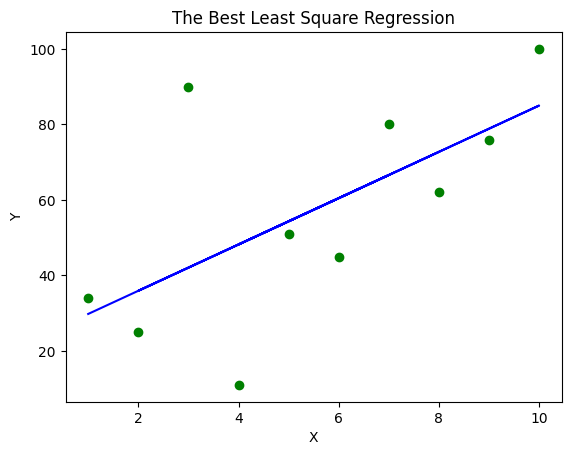

In [249]:
x = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8]
y = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
Y = np.vstack(y)

hasilInvers = np.linalg.inv(np.dot(A.T, A))
beta = np.dot(np.dot(hasilInvers, A.T), Y)

m = beta[0]
b = beta[1]

y_garis = m * x + b

plt.plot(x, y, 'go')
plt.plot(x, y_garis, 'b-')

plt.title("The Best Least Square Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [250]:
def newtonRaphson(f, df, x0, tolerance, max):
    if(max <= 0):
        print("With current iteration, the root is not found")
        return
    
    if np.abs(f(x0)) < tolerance:
        print(f"The Root: {x0}")
        return
    
    print(f"Iteration {max}, root: {x0}")
    return newtonRaphson(f, df, x0 - (f(x0)/df(x0)), tolerance, max-1)

In [251]:
from sympy import *

x = symbols('x')

f1 = lambda x: 7*x**4 - 3*x**2 + x
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

f2 = lambda x: 8*x**6 + 5*x**4 - 2
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

x0 = 1
tolerance = 0.006541
max = 5

print("Equation 1: ")
print("f(x) = 7x^4- 3x^2 + x")
print("f'(x) = 28x^3 - 6x")
newtonRaphson(f1, df1, x0, tolerance, max)
print()

print("Equation 2: ")
print("f(x) = 8x^6 + 5x^4 - 2")
print("f'(x) = 48x^5 + 20x^3")
newtonRaphson(f2, df2, x0, tolerance, max)


Equation 1: 
f(x) = 7x^4- 3x^2 + x
f'(x) = 28x^3 - 6x
Iteration 5, root: 1
Iteration 4, root: 0.782608695652174
Iteration 3, root: 0.6210684619745717
Iteration 2, root: 0.4941304782745192
Iteration 1, root: 0.3675198418052212
With current iteration, the root is not found

Equation 2: 
f(x) = 8x^6 + 5x^4 - 2
f'(x) = 48x^5 + 20x^3
Iteration 5, root: 1
Iteration 4, root: 0.8382352941176471
Iteration 3, root: 0.7357300136098767
Iteration 2, root: 0.6956565368667311
The Root: 0.6903195287760319


In [252]:
a = -4
b = 3
n = 30

boxWidth = (b-a)/(n-1)
x = np.linspace(a, b, n)

def f(x):
    return 3*x**4 - 7*x**2 + 5

xLeft = x[:-1]
yLeft = f(xLeft)
leftRiemann = boxWidth * np.sum(np.abs(yLeft))

xRight = x[1:]
yRight = f(xRight)
rightRiemann = boxWidth * np.sum(np.abs(yRight))

xMid = (xLeft + xRight)/2
yMid = f(xMid)
midRiemann = boxWidth * np.sum(np.abs(yMid))

trapezoid = np.sum(np.abs(yLeft) + np.abs(yRight))/2 * boxWidth

print(f"Left Riemann: {leftRiemann}")
print(f"Right Riemann: {rightRiemann}")
print(f"Mid Riemann: {midRiemann}")
print(f"Trapezoid: {trapezoid}")


Left Riemann: 645.1387652149571
Right Riemann: 530.2422134908192
Mid Riemann: 580.4556464297783
Trapezoid: 587.690489352888
